## Gradient boost

##### The sinking of the RMS Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew members. This sensational tragedy shocked the international community and eventually, it led to better safety regulations for ships. By examining factors such as class, sex, and age, we will experiment with different machine learning algorithms and build a program that can predict whether a given passenger would have survived this disaster. Initially we will import all the necessary libraries and the dataset. The dataset was downloaded from Kaggle.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sb

In [2]:
dataset=pd.read_csv('C:/Users/Vivek/Downloads/titanic_train.csv')
print(dataset.shape)
dataset.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##### The dataset has 891 records and 12 columns. The column heading variables have the following meanings: PassengerId: Id Survived: Survival (0 = no; 1 = yes) Pclass: Passenger class (1 = first; 2 = second; 3 = third) Name: Name of the passenger Sex: Sex of the passenger Age: Age of the passenger SibSp: Number of siblings/spouses aboard Parch: Number of parents/children aboard Ticket: Ticket number Fare: Passenger fare Cabin: Cabin of the passenger Embarked: Port of embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
dataset.info()

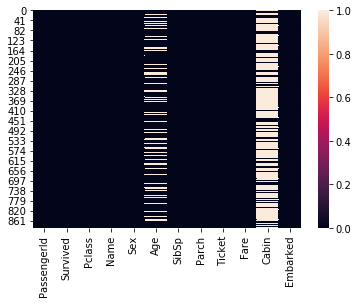

In [3]:
sb.heatmap(dataset.isnull())

##### we can observe there are lot of missing values in the Age and the Cabin columns. We will see different columns with respect to Survived column by using a countplot

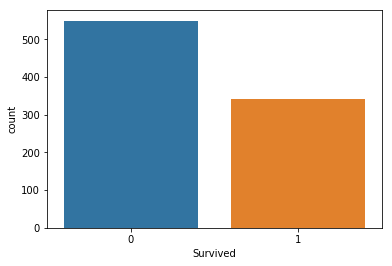

In [4]:
sb.countplot(x='Survived', data=dataset)

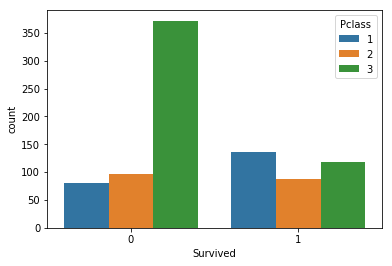

In [5]:
sb.countplot(x='Survived', hue='Pclass', data=dataset)

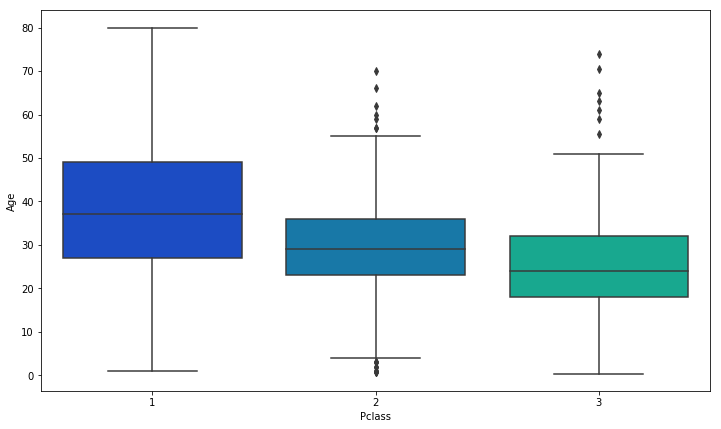

In [6]:
plt.figure(figsize=(12,7))
sb.boxplot(x='Pclass', y='Age', data=dataset, palette='winter')

##### We can obsrve that the average age varies with Pclass as seen in the box plot above.To fill out the missing values in age column, we will define a function to impute the age according to the Pclass value.

In [7]:
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age

In [8]:
dataset['Age']=dataset[['Age','Pclass']].apply(impute_age, axis=1)

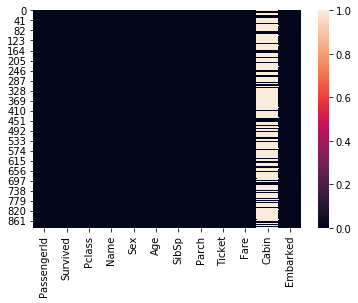

In [9]:
sb.heatmap(dataset.isnull())

##### Since the Cabin values doesnot help us in this analysis we will drop that column

In [10]:
dataset.drop('Cabin', axis=1, inplace=True)

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.6+ KB


In [12]:
sex=pd.get_dummies(dataset['Sex'],drop_first=True)
embark=pd.get_dummies(dataset['Embarked'],drop_first=True)

In [13]:
dataset.drop(['PassengerId','Sex','Embarked','Name','Ticket'], axis=1, inplace=True)

In [14]:
dataset=pd.concat([dataset,sex,embark], axis=1)

In [15]:
dataset.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


##### Diving the data into train and test and applying Gradient boost

In [16]:
from sklearn.model_selection import train_test_split                                      
X_train, X_test, y_train, y_test= train_test_split(dataset.drop('Survived', axis=1),         ##xtrain is all columns except 
                                                  dataset['Survived'], test_size=0.20,      ##survived and xtest is survived
                                                  random_state=101)

In [17]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

In [18]:
learning_rates=[0.05,0.1,0.25,0.5,0.75,1]
for learning_rate in learning_rates:
    gb= GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, random_state=0)
    gb.fit(X_train,y_train)
    print('Learning rate:', learning_rate)
    print('Accuracy score(training):{0:.3f}'.format(gb.score(X_train,y_train)))
    print('Accuracy score(validation):{0:.3f}'.format(gb.score(X_test,y_test)))
    print()

Learning rate: 0.05
Accuracy score(training):0.837
Accuracy score(validation):0.788

Learning rate: 0.1
Accuracy score(training):0.844
Accuracy score(validation):0.816

Learning rate: 0.25
Accuracy score(training):0.867
Accuracy score(validation):0.810

Learning rate: 0.5
Accuracy score(training):0.893
Accuracy score(validation):0.821

Learning rate: 0.75
Accuracy score(training):0.914
Accuracy score(validation):0.777

Learning rate: 1
Accuracy score(training):0.933
Accuracy score(validation):0.816



##### We will choose the 0.5 learning rate as the testing (validation) rate is high and there is no much difference between training and validation rates.

In [19]:
gb= GradientBoostingClassifier(n_estimators=20, learning_rate=0.5, random_state=0)
gb.fit(X_train, y_train)
predictions=gb.predict(X_test)

print('Confusion matrix:')
print(confusion_matrix(y_test, predictions))
print()
print('Classification report:')
print(classification_report(y_test, predictions))

Confusion matrix:
[[92  7]
 [25 55]]

Classification report:
              precision    recall  f1-score   support

           0       0.79      0.93      0.85        99
           1       0.89      0.69      0.77        80

   micro avg       0.82      0.82      0.82       179
   macro avg       0.84      0.81      0.81       179
weighted avg       0.83      0.82      0.82       179



In [20]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [21]:
def plot_roc_curve(fpr,tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0,1],[0,1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic(ROC) curve')
    plt.show()

In [22]:
probs=gb.predict_proba(X_test)
probs=probs[:,1]

In [23]:
auc=roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)

AUC: 0.86


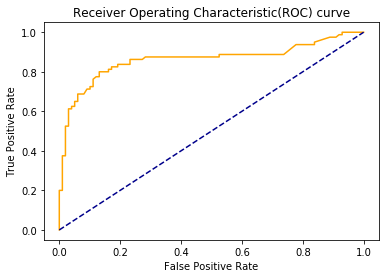

In [24]:
fpr, tpr, thresholds=roc_curve(y_test, probs)
plot_roc_curve(fpr,tpr)